In [1]:
import numpy as np

In [2]:
a1 = np.random.rand(30,2)
a1

array([[0.18813964, 0.89205337],
       [0.83085962, 0.3561507 ],
       [0.16794691, 0.79173038],
       [0.3248434 , 0.76556329],
       [0.59854207, 0.68536614],
       [0.94339896, 0.09791247],
       [0.62449364, 0.86062335],
       [0.99319715, 0.60377521],
       [0.47004157, 0.90404367],
       [0.73114976, 0.81778359],
       [0.28189772, 0.77306197],
       [0.91087757, 0.3482625 ],
       [0.68436394, 0.09601179],
       [0.72240788, 0.76745253],
       [0.32848301, 0.48023446],
       [0.58162143, 0.28612157],
       [0.94102306, 0.8391275 ],
       [0.29322506, 0.41459556],
       [0.58185939, 0.5723229 ],
       [0.97529421, 0.78950378],
       [0.96898281, 0.2859882 ],
       [0.12814165, 0.87432849],
       [0.77274445, 0.6959832 ],
       [0.632918  , 0.84253255],
       [0.45286298, 0.97664593],
       [0.72479286, 0.20676011],
       [0.8414649 , 0.35581363],
       [0.6072354 , 0.59246033],
       [0.74935373, 0.48141178],
       [0.69613452, 0.20679517]])

In [3]:
b1 = np.hstack((a1, np.ones((a1.shape[0], 1), dtype=a1.dtype)))
b1

array([[0.18813964, 0.89205337, 1.        ],
       [0.83085962, 0.3561507 , 1.        ],
       [0.16794691, 0.79173038, 1.        ],
       [0.3248434 , 0.76556329, 1.        ],
       [0.59854207, 0.68536614, 1.        ],
       [0.94339896, 0.09791247, 1.        ],
       [0.62449364, 0.86062335, 1.        ],
       [0.99319715, 0.60377521, 1.        ],
       [0.47004157, 0.90404367, 1.        ],
       [0.73114976, 0.81778359, 1.        ],
       [0.28189772, 0.77306197, 1.        ],
       [0.91087757, 0.3482625 , 1.        ],
       [0.68436394, 0.09601179, 1.        ],
       [0.72240788, 0.76745253, 1.        ],
       [0.32848301, 0.48023446, 1.        ],
       [0.58162143, 0.28612157, 1.        ],
       [0.94102306, 0.8391275 , 1.        ],
       [0.29322506, 0.41459556, 1.        ],
       [0.58185939, 0.5723229 , 1.        ],
       [0.97529421, 0.78950378, 1.        ],
       [0.96898281, 0.2859882 , 1.        ],
       [0.12814165, 0.87432849, 1.        ],
       [0.

In [4]:
a2 = -1*np.random.rand(30,2)
a2

array([[-0.16556041, -0.12866242],
       [-0.44680591, -0.35677533],
       [-0.29731628, -0.37456112],
       [-0.2916163 , -0.12584421],
       [-0.93554663, -0.80177247],
       [-0.28108216, -0.65826095],
       [-0.41379585, -0.37528656],
       [-0.84504842, -0.72194985],
       [-0.72605553, -0.83095685],
       [-0.59098954, -0.07788452],
       [-0.1418696 , -0.80944796],
       [-0.9885169 , -0.84005823],
       [-0.03087291, -0.93207655],
       [-0.39957873, -0.18163633],
       [-0.10693131, -0.02383752],
       [-0.48992818, -0.87285049],
       [-0.15877586, -0.87343892],
       [-0.80905601, -0.15233797],
       [-0.14337701, -0.6067064 ],
       [-0.60615334, -0.09929486],
       [-0.76430172, -0.29795118],
       [-0.1862166 , -0.38883373],
       [-0.97287756, -0.97117851],
       [-0.7025644 , -0.2310942 ],
       [-0.73434949, -0.66058664],
       [-0.67180359, -0.42399817],
       [-0.06862538, -0.89501505],
       [-0.21776493, -0.11819717],
       [-0.38761015,

In [5]:
b2 = np.hstack((a2, np.zeros((a2.shape[0], 1), dtype=a2.dtype)))
b2

array([[-0.16556041, -0.12866242,  0.        ],
       [-0.44680591, -0.35677533,  0.        ],
       [-0.29731628, -0.37456112,  0.        ],
       [-0.2916163 , -0.12584421,  0.        ],
       [-0.93554663, -0.80177247,  0.        ],
       [-0.28108216, -0.65826095,  0.        ],
       [-0.41379585, -0.37528656,  0.        ],
       [-0.84504842, -0.72194985,  0.        ],
       [-0.72605553, -0.83095685,  0.        ],
       [-0.59098954, -0.07788452,  0.        ],
       [-0.1418696 , -0.80944796,  0.        ],
       [-0.9885169 , -0.84005823,  0.        ],
       [-0.03087291, -0.93207655,  0.        ],
       [-0.39957873, -0.18163633,  0.        ],
       [-0.10693131, -0.02383752,  0.        ],
       [-0.48992818, -0.87285049,  0.        ],
       [-0.15877586, -0.87343892,  0.        ],
       [-0.80905601, -0.15233797,  0.        ],
       [-0.14337701, -0.6067064 ,  0.        ],
       [-0.60615334, -0.09929486,  0.        ],
       [-0.76430172, -0.29795118,  0.   

In [6]:
B = np.vstack([b1, b2])
B

array([[ 0.18813964,  0.89205337,  1.        ],
       [ 0.83085962,  0.3561507 ,  1.        ],
       [ 0.16794691,  0.79173038,  1.        ],
       [ 0.3248434 ,  0.76556329,  1.        ],
       [ 0.59854207,  0.68536614,  1.        ],
       [ 0.94339896,  0.09791247,  1.        ],
       [ 0.62449364,  0.86062335,  1.        ],
       [ 0.99319715,  0.60377521,  1.        ],
       [ 0.47004157,  0.90404367,  1.        ],
       [ 0.73114976,  0.81778359,  1.        ],
       [ 0.28189772,  0.77306197,  1.        ],
       [ 0.91087757,  0.3482625 ,  1.        ],
       [ 0.68436394,  0.09601179,  1.        ],
       [ 0.72240788,  0.76745253,  1.        ],
       [ 0.32848301,  0.48023446,  1.        ],
       [ 0.58162143,  0.28612157,  1.        ],
       [ 0.94102306,  0.8391275 ,  1.        ],
       [ 0.29322506,  0.41459556,  1.        ],
       [ 0.58185939,  0.5723229 ,  1.        ],
       [ 0.97529421,  0.78950378,  1.        ],
       [ 0.96898281,  0.2859882 ,  1.   

<IPython.core.display.Javascript object>


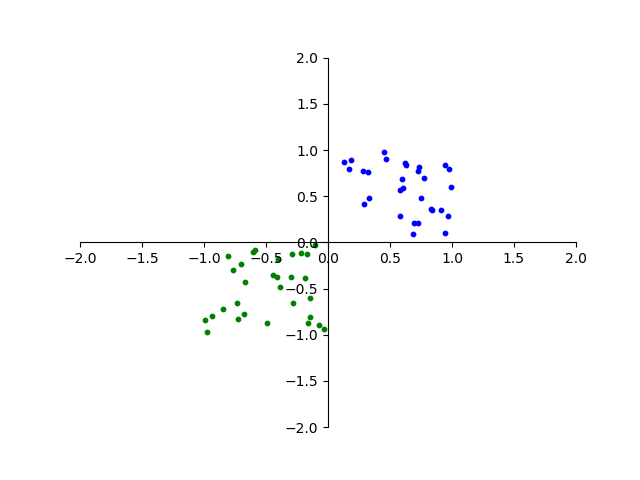

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)
for x in b1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b2:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [8]:
from populacja import Populacja
import numpy as np

In [9]:
populacja = Populacja(lam=40, mi=20, data=B)
for os in populacja.populacja_P:
    print(os)

In [10]:
for osobnik in populacja.populacja_P:
    print(osobnik.wartosc_loss_1)

30.0
54.0
30.0
30.0
30.0
30.0
30.0
37.0
4.0
51.0
16.0
40.0
50.0
30.0
25.0
2.0
43.0
30.0
30.0
56.0


<IPython.core.display.Javascript object>


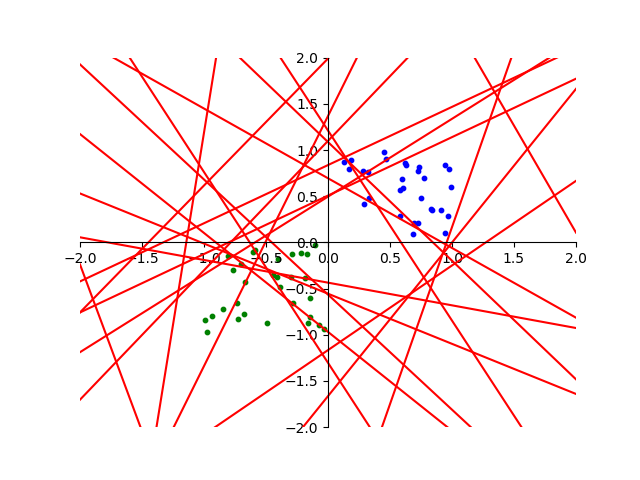

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for os in populacja.populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r')
x = np.linspace(-2,2,20)
for x in b1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b2:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [12]:
populacja.krzyzowanie()

<IPython.core.display.Javascript object>


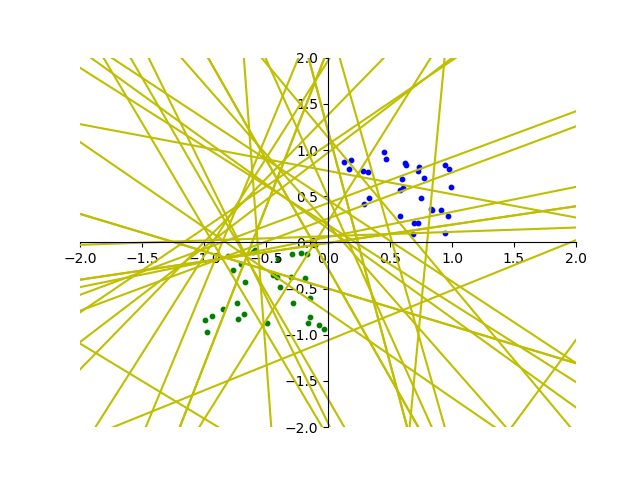

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

# for os in populacja.populacja_P:
#     wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
#     wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
#     plt.plot(x, wsp_a*x+wsp_b, '-r')
x = np.linspace(-2,2,20)
for os in populacja.populacja_potomkow:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-y')
for x in b1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b2:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [14]:
for osobnik in populacja.populacja_potomkow:
    print(osobnik.wartosc_loss_1)

30.0
60.0
30.0
37.0
53.0
8.0
30.0
54.0
2.0
30.0
40.0
49.0
0.0
12.0
1.0
0.0
56.0
37.0
30.0
1.0
54.0
38.0
0.0
0.0
49.0
30.0
30.0
43.0
30.0
60.0
0.0
50.0
30.0
37.0
30.0
18.0
46.0
50.0
30.0
42.0


In [15]:
populacja.selekcja_loss_1()

In [16]:
for os in populacja.populacja_P:
    print(os.wartosc_loss_1)

0.0
0.0
0.0
0.0
0.0
1.0
1.0
2.0
2.0
4.0
8.0
12.0
16.0
18.0
25.0
30.0
30.0
30.0
30.0
30.0


<IPython.core.display.Javascript object>


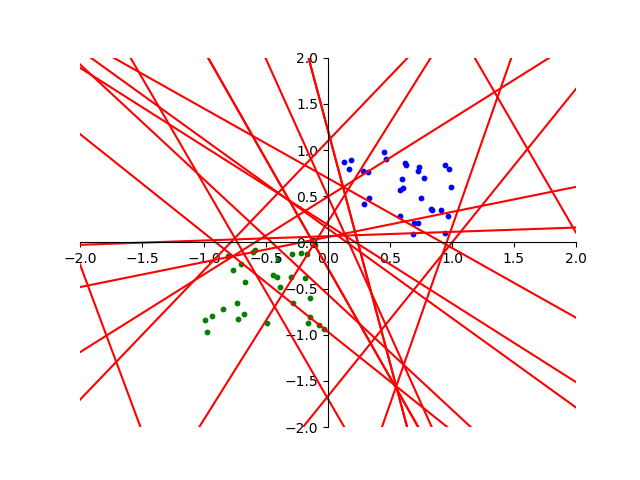

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for os in populacja.populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r')
x = np.linspace(-2,2,20)
for x in b1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b2:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [18]:
populacja.krzyzowanie()

In [19]:
populacja.selekcja_loss_1()

<IPython.core.display.Javascript object>


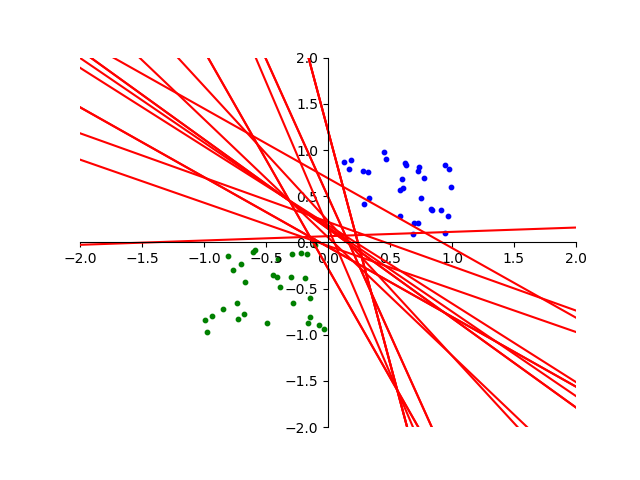

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for os in populacja.populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r')
x = np.linspace(-2,2,20)
for x in b1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b2:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [21]:
populacja.krzyzowanie()

In [22]:
populacja.selekcja_loss_1()

<IPython.core.display.Javascript object>


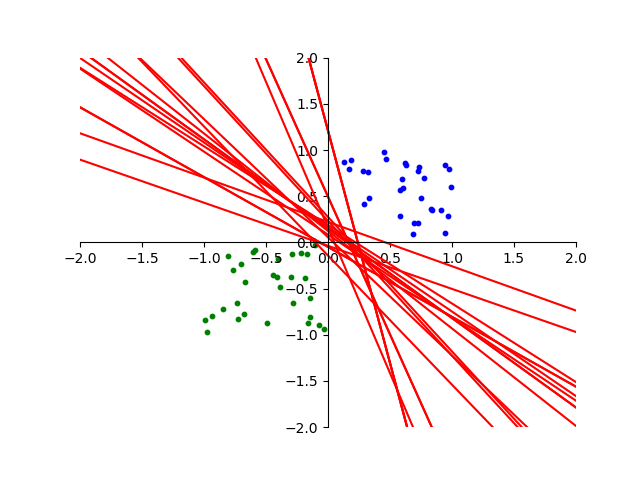

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for os in populacja.populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r')
x = np.linspace(-2,2,20)
for x in b1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b2:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [24]:
populacja.krzyzowanie()

In [25]:
populacja.selekcja_loss_1()

<IPython.core.display.Javascript object>


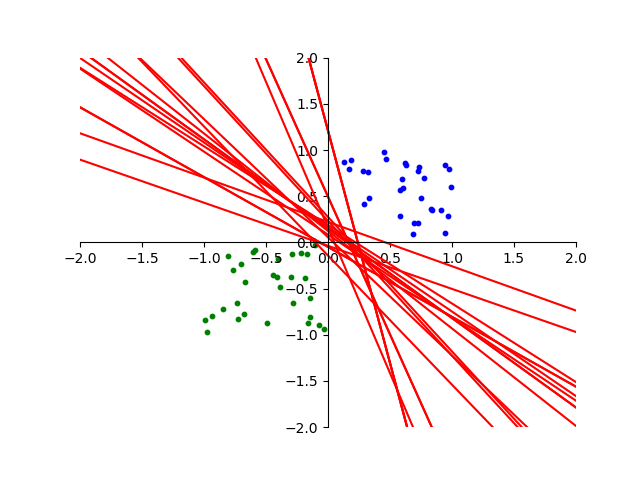

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for os in populacja.populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r')
x = np.linspace(-2,2,20)
for x in b1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b2:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [27]:
for x in range(0, 1000, 1):
    populacja.krzyzowanie()
    populacja.selekcja_loss_1()

<IPython.core.display.Javascript object>


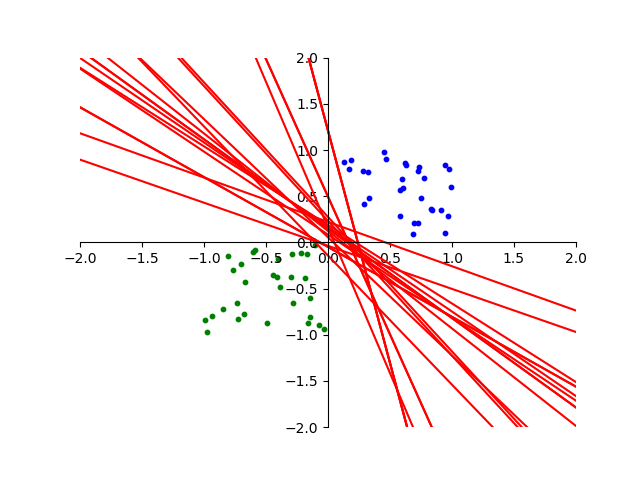

In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for os in populacja.populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r')
x = np.linspace(-2,2,20)
for x in b1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b2:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

<IPython.core.display.Javascript object>


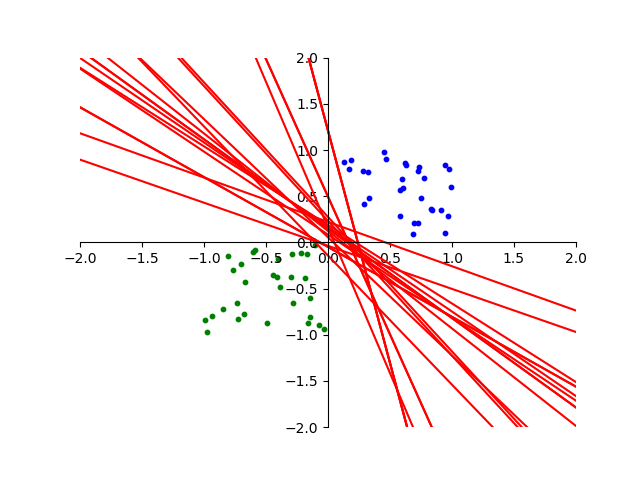

In [29]:
for x in range(0, 10000, 1):
    populacja.krzyzowanie()
    populacja.selekcja_loss_1()
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for os in populacja.populacja_P:
    wsp_a = -os.wektor_wspol_w[1]/os.wektor_wspol_w[2]
    wsp_b = -os.wektor_wspol_w[0]/os.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r')
x = np.linspace(-2,2,20)
for x in b1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b2:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [ ]:
z = (np.random.rand(1, 3)-0.5)*2
z

In [ ]:
y = (np.random.rand(1, 3)+2.4)
y

In [ ]:
z = y
z

In [ ]:
a[:] = y[:]
a

In [ ]:
def func(x):
    return -0.5*x

a1 = (np.random.rand(200,2)*3)
a2 = (np.random.rand(200,2)*3)
for x in a2:
    print(x)
    print()

In [ ]:
for x in a2[:]:
    x[1]=x[1]*(-1)
a2

In [ ]:
for x in a2[:]:
    if x[1]< func(x[0]):
        a3 = np.delete(x)

In [ ]:
b = -2*(np.random.rand(200,2))
b

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
for x in a1:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in a2:
    plt.scatter(x[0],x[1], s=10, c="green")
plt.show()

In [ ]:
percx = []
for i in range(0,1000,1):
    percx.append(Perceptron(0.3,2))

In [ ]:
for perc in percx:
    print(perc.wektor_wspol_w)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for perc in percx:
    wsp_a = -perc.wektor_wspol_w[1]/perc.wektor_wspol_w[2]
    wsp_b = -perc.wektor_wspol_w[0]/perc.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r', label='y=2x+1')
for x in a:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [ ]:

for perc in percx:
    perc.mi = 2
    for i in range(0,2000,1):
        perc.uczenie(b[i], 0)
        perc.uczenie(a[i],1)


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for perc in percx:
    wsp_a = -perc.wektor_wspol_w[1]/perc.wektor_wspol_w[2]
    wsp_b = -perc.wektor_wspol_w[0]/perc.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r', label='y=2x+1')
for x in a:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [ ]:
perc.mi = 2
for i in range(0,2000,1):
    perc.uczenie(b[i], 0)
    perc.uczenie(a[i],1)

In [ ]:
perc.mi = 2
for i in range(10,60,1):
    perc.uczenie(b[i], 0)
    perc.uczenie(a[i],1)

In [ ]:
perc.mi = 2
for i in range(40,100,1):
    perc.uczenie(b[i], 0)
    perc.uczenie(a[i],1)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
for x in a:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b:
    plt.scatter(x[0],x[1], s=10, c="red")

wsp_a = -perc.wektor_wspol_w[1]/perc.wektor_wspol_w[2]
wsp_b = -perc.wektor_wspol_w[0]/perc.wektor_wspol_w[2]

x = np.linspace(-2,2,100)
plt.plot(x, wsp_a*x+wsp_b, '-r', label='y=2x+1')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
a3 = np.random.rand(4,5,3)
a3

In [ ]:
for a in a3[1]:
    print(a[1])
    print()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
print(X,Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
